# MNIST Dataset Analysis

This notebook loads and analyzes the MNIST handwritten digit dataset.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

2025-06-24 22:03:12.895132: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.16.2
Keras version: 3.9.1


## 1. Load MNIST Dataset

The MNIST dataset is built into TensorFlow/Keras, so we can load it directly.

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Classes: {np.unique(y_train)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Pixel value range: 0 to 255
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


## 2. Data Exploration and Visualization

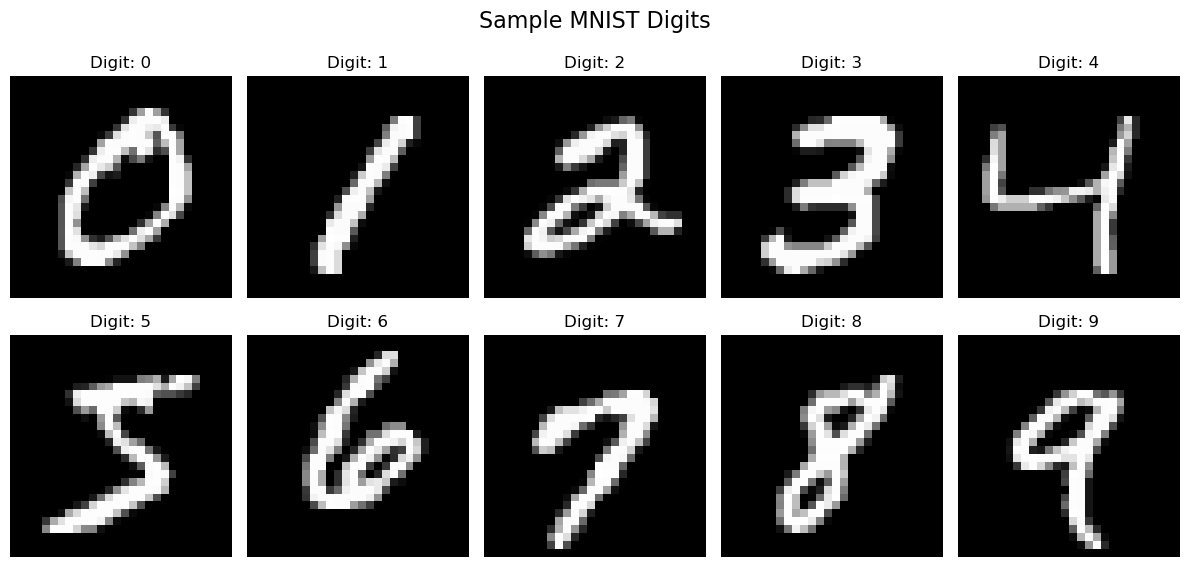

In [3]:
# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Digits', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5
    
    # Find first occurrence of digit i
    idx = np.where(y_train == i)[0][0]
    
    axes[row, col].imshow(x_train[idx], cmap='gray')
    axes[row, col].set_title(f'Digit: {i}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

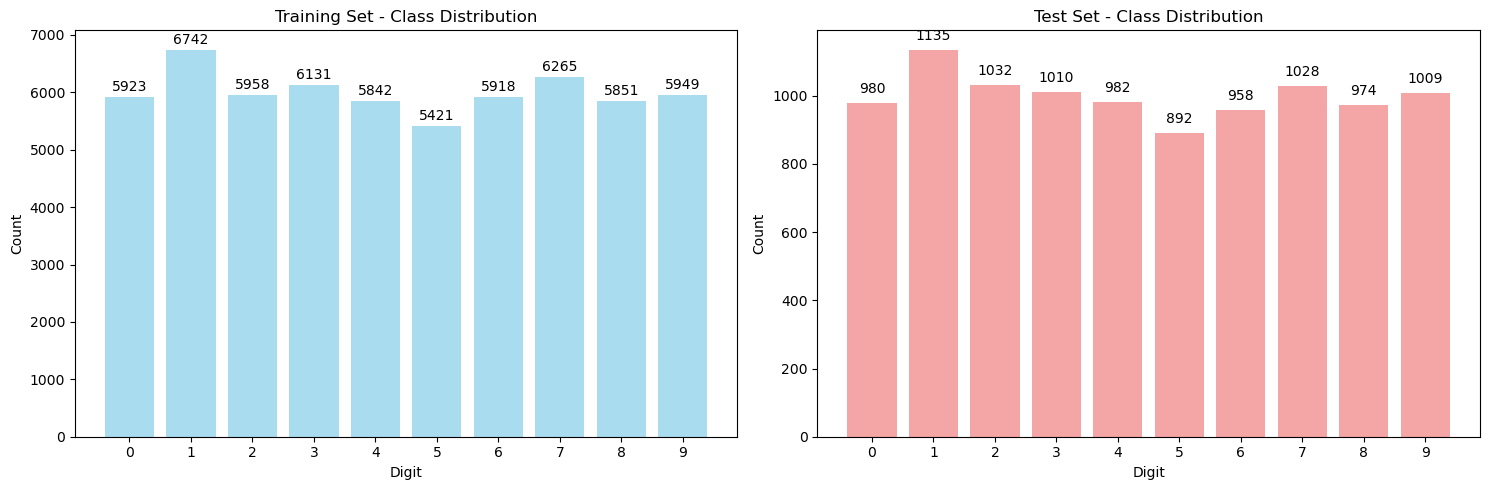

Training set class distribution:
Digit 0: 5923 samples (9.9%)
Digit 1: 6742 samples (11.2%)
Digit 2: 5958 samples (9.9%)
Digit 3: 6131 samples (10.2%)
Digit 4: 5842 samples (9.7%)
Digit 5: 5421 samples (9.0%)
Digit 6: 5918 samples (9.9%)
Digit 7: 6265 samples (10.4%)
Digit 8: 5851 samples (9.8%)
Digit 9: 5949 samples (9.9%)


In [4]:
# Class distribution analysis
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training set distribution
ax1.bar(range(10), train_counts, alpha=0.7, color='skyblue')
ax1.set_title('Training Set - Class Distribution')
ax1.set_xlabel('Digit')
ax1.set_ylabel('Count')
ax1.set_xticks(range(10))

# Add count labels on bars
for i, count in enumerate(train_counts):
    ax1.text(i, count + 50, str(count), ha='center', va='bottom')

# Test set distribution
ax2.bar(range(10), test_counts, alpha=0.7, color='lightcoral')
ax2.set_title('Test Set - Class Distribution')
ax2.set_xlabel('Digit')
ax2.set_ylabel('Count')
ax2.set_xticks(range(10))

# Add count labels on bars
for i, count in enumerate(test_counts):
    ax2.text(i, count + 20, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Training set class distribution:")
for i, count in enumerate(train_counts):
    print(f"Digit {i}: {count} samples ({count/len(y_train)*100:.1f}%)")

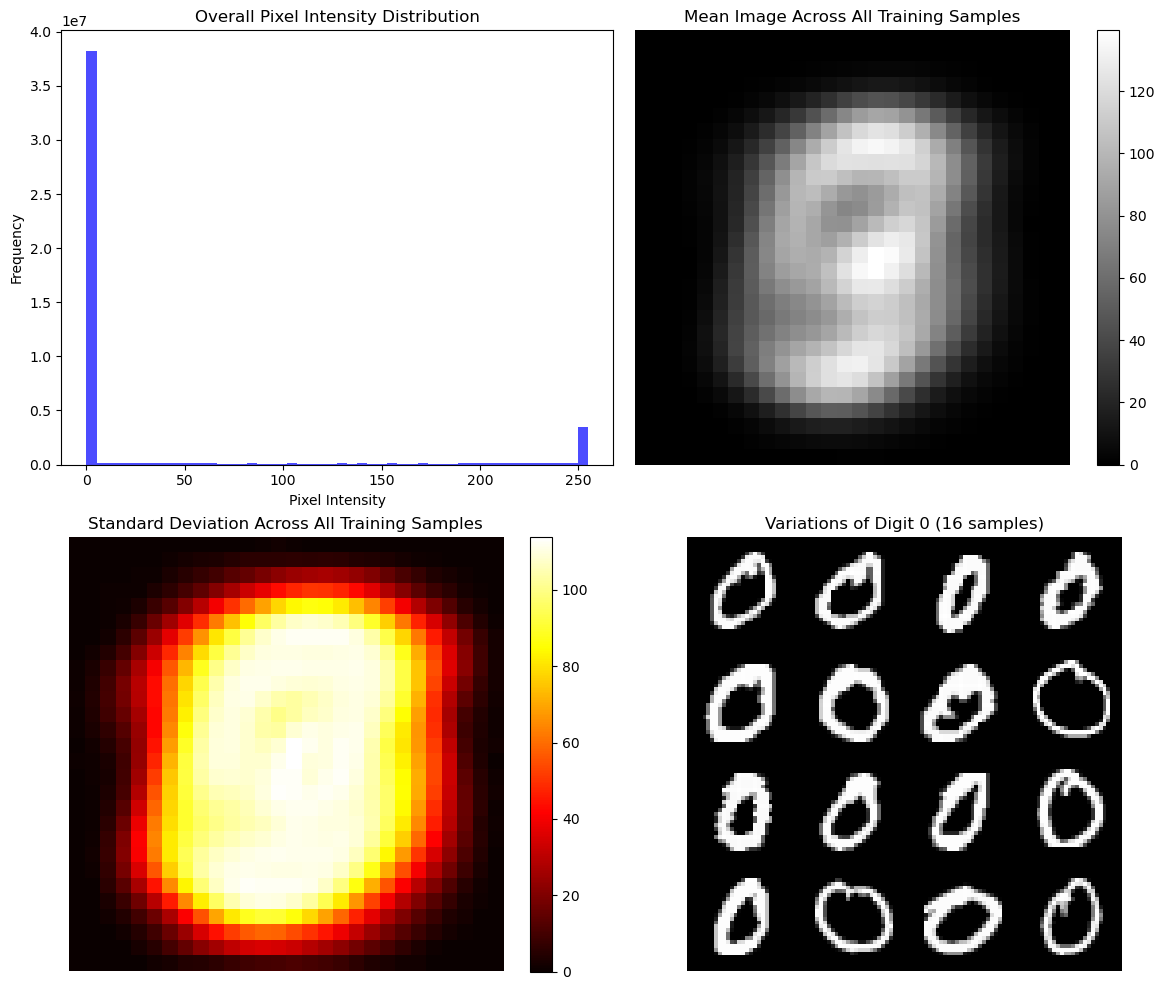

In [5]:
# Pixel intensity analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Overall pixel intensity distribution
axes[0, 0].hist(x_train.flatten(), bins=50, alpha=0.7, color='blue')
axes[0, 0].set_title('Overall Pixel Intensity Distribution')
axes[0, 0].set_xlabel('Pixel Intensity')
axes[0, 0].set_ylabel('Frequency')

# Mean image
mean_image = np.mean(x_train, axis=0)
im1 = axes[0, 1].imshow(mean_image, cmap='gray')
axes[0, 1].set_title('Mean Image Across All Training Samples')
axes[0, 1].axis('off')
plt.colorbar(im1, ax=axes[0, 1])

# Standard deviation image
std_image = np.std(x_train, axis=0)
im2 = axes[1, 0].imshow(std_image, cmap='hot')
axes[1, 0].set_title('Standard Deviation Across All Training Samples')
axes[1, 0].axis('off')
plt.colorbar(im2, ax=axes[1, 0])

# Sample variations for digit 0
digit_0_indices = np.where(y_train == 0)[0][:16]
digit_0_samples = x_train[digit_0_indices]

# Create a 4x4 grid of digit 0 samples
digit_0_grid = np.zeros((4*28, 4*28))
for i in range(4):
    for j in range(4):
        digit_0_grid[i*28:(i+1)*28, j*28:(j+1)*28] = digit_0_samples[i*4 + j]

axes[1, 1].imshow(digit_0_grid, cmap='gray')
axes[1, 1].set_title('Variations of Digit 0 (16 samples)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [6]:
# Normalize pixel values to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print(f"Normalized training data range: {x_train_normalized.min()} to {x_train_normalized.max()}")
print(f"Normalized test data range: {x_test_normalized.min()} to {x_test_normalized.max()}")

# Reshape for CNN (add channel dimension)
x_train_cnn = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_normalized.reshape(-1, 28, 28, 1)

print(f"CNN input shape: {x_train_cnn.shape}")

# One-hot encode labels
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

print(f"One-hot encoded labels shape: {y_train_onehot.shape}")
print(f"Sample one-hot label: {y_train_onehot[0]} (original: {y_train[0]})")

Normalized training data range: 0.0 to 1.0
Normalized test data range: 0.0 to 1.0
CNN input shape: (60000, 28, 28, 1)
One-hot encoded labels shape: (60000, 10)
Sample one-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] (original: 5)


## 4. Basic Statistical Analysis

Statistics by Digit:
   digit  count  mean_intensity  std_intensity  mean_nonzero_pixels  \
0      0   5923           0.173          0.348              191.975   
1      1   6742           0.076          0.244               85.846   
2      2   5958           0.149          0.326              168.809   
3      3   6131           0.142          0.318              163.337   
4      4   5842           0.121          0.297              141.807   
5      5   5421           0.129          0.304              152.330   
6      6   5918           0.137          0.315              156.935   
7      7   6265           0.115          0.292              131.397   
8      8   5851           0.150          0.325              173.316   
9      9   5949           0.123          0.299              143.033   

   std_nonzero_pixels  
0              33.708  
1              19.972  
2              32.944  
3              33.651  
4              27.805  
5              33.576  
6              32.568  
7    

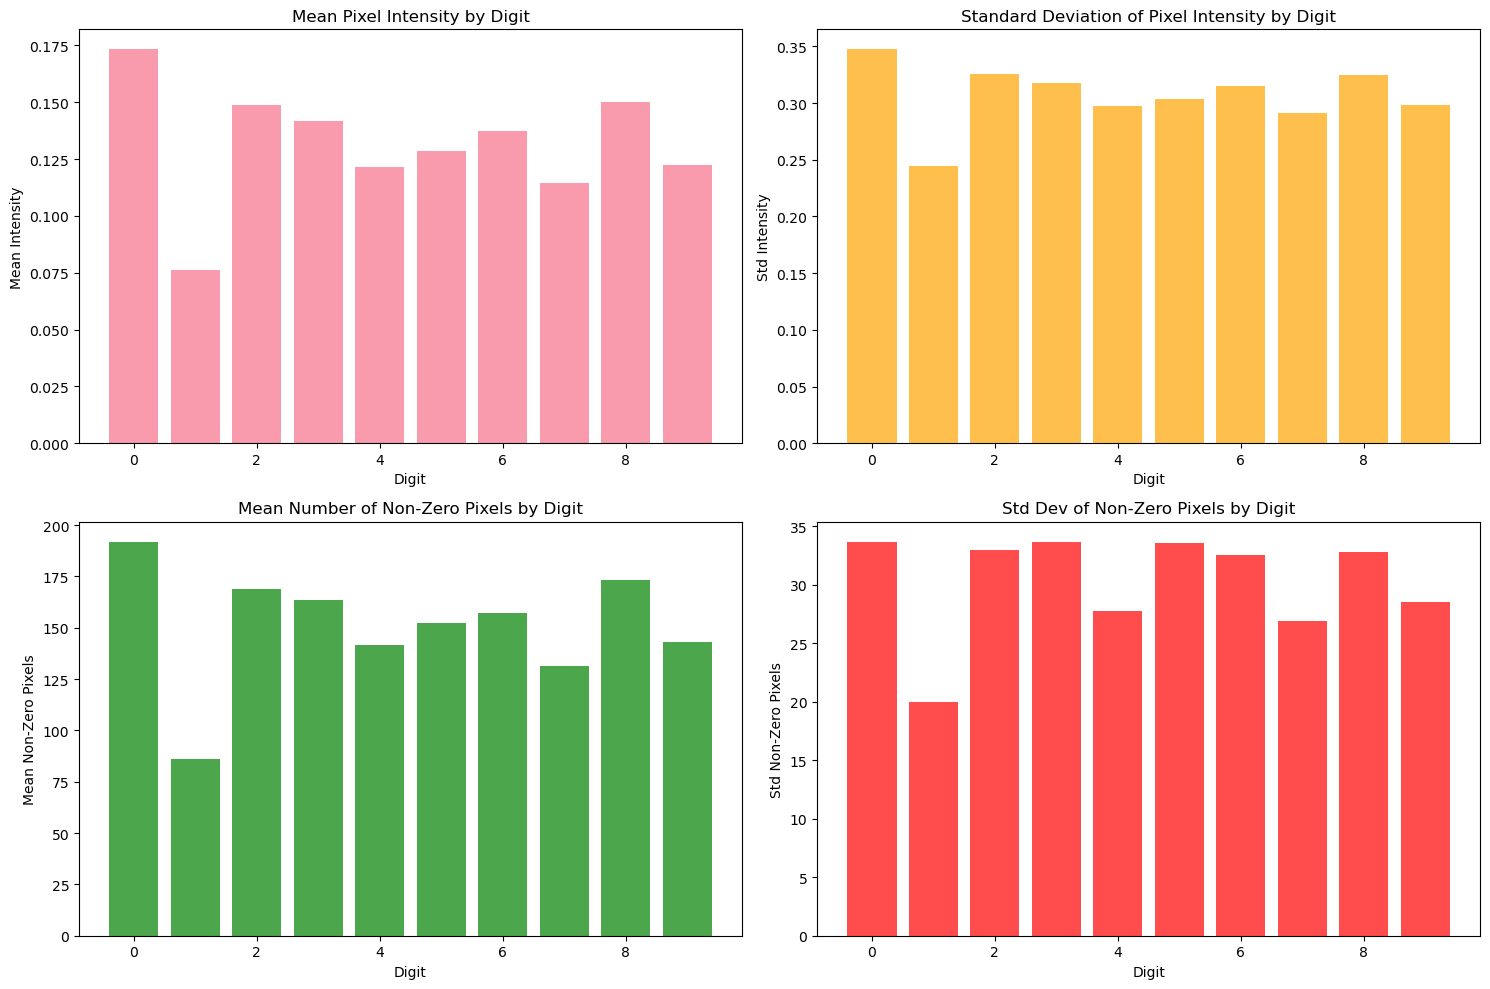

In [7]:
# Calculate statistics for each digit class
digit_stats = []

for digit in range(10):
    digit_images = x_train_normalized[y_train == digit]
    
    stats = {
        'digit': digit,
        'count': len(digit_images),
        'mean_intensity': np.mean(digit_images),
        'std_intensity': np.std(digit_images),
        'mean_nonzero_pixels': np.mean(np.sum(digit_images > 0, axis=(1, 2))),
        'std_nonzero_pixels': np.std(np.sum(digit_images > 0, axis=(1, 2)))
    }
    digit_stats.append(stats)

# Convert to DataFrame for better visualization
stats_df = pd.DataFrame(digit_stats)
print("Statistics by Digit:")
print(stats_df.round(3))

# Visualize statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Mean intensity by digit
axes[0, 0].bar(stats_df['digit'], stats_df['mean_intensity'], alpha=0.7)
axes[0, 0].set_title('Mean Pixel Intensity by Digit')
axes[0, 0].set_xlabel('Digit')
axes[0, 0].set_ylabel('Mean Intensity')

# Standard deviation of intensity by digit
axes[0, 1].bar(stats_df['digit'], stats_df['std_intensity'], alpha=0.7, color='orange')
axes[0, 1].set_title('Standard Deviation of Pixel Intensity by Digit')
axes[0, 1].set_xlabel('Digit')
axes[0, 1].set_ylabel('Std Intensity')

# Mean number of non-zero pixels
axes[1, 0].bar(stats_df['digit'], stats_df['mean_nonzero_pixels'], alpha=0.7, color='green')
axes[1, 0].set_title('Mean Number of Non-Zero Pixels by Digit')
axes[1, 0].set_xlabel('Digit')
axes[1, 0].set_ylabel('Mean Non-Zero Pixels')

# Standard deviation of non-zero pixels
axes[1, 1].bar(stats_df['digit'], stats_df['std_nonzero_pixels'], alpha=0.7, color='red')
axes[1, 1].set_title('Std Dev of Non-Zero Pixels by Digit')
axes[1, 1].set_xlabel('Digit')
axes[1, 1].set_ylabel('Std Non-Zero Pixels')

plt.tight_layout()
plt.show()

## 5. Save Processed Data

Save the preprocessed data for use in other notebooks.

In [8]:
# Save preprocessed data
np.savez_compressed('mnist_preprocessed.npz',
                   x_train=x_train_normalized,
                   x_test=x_test_normalized,
                   x_train_cnn=x_train_cnn,
                   x_test_cnn=x_test_cnn,
                   y_train=y_train,
                   y_test=y_test,
                   y_train_onehot=y_train_onehot,
                   y_test_onehot=y_test_onehot)

print("Preprocessed data saved to 'mnist_preprocessed.npz'")
print("\nData shapes saved:")
print(f"x_train_normalized: {x_train_normalized.shape}")
print(f"x_train_cnn: {x_train_cnn.shape}")
print(f"y_train_onehot: {y_train_onehot.shape}")

Preprocessed data saved to 'mnist_preprocessed.npz'

Data shapes saved:
x_train_normalized: (60000, 28, 28)
x_train_cnn: (60000, 28, 28, 1)
y_train_onehot: (60000, 10)


## Summary

This notebook has:
1. ✅ Loaded the MNIST dataset (60,000 training + 10,000 test images)
2. ✅ Explored the data distribution and characteristics
3. ✅ Visualized sample digits and statistical properties
4. ✅ Preprocessed the data (normalization, reshaping, one-hot encoding)
5. ✅ Analyzed digit-specific statistics
6. ✅ Saved preprocessed data for future use

**Key Findings:**
- Dataset is well-balanced with ~6,000 samples per digit
- Images are 28x28 grayscale with pixel values 0-255
- Different digits have varying complexity and pixel density
- Data is ready for machine learning model training

**Next Steps:**
- Build and train various neural network models
- Implement data augmentation techniques
- Apply model interpretability methods
- Create ensemble models for maximum accuracy